In [1]:
%autosave 180

Autosaving every 180 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline

In [51]:
table = pd.read_csv('river_banfield.csv', sep= ';', index_col = 0)

In [52]:
table.head(11)

,nombre_apellido,x_promedio,y_promedio,pases,3066,87508,100761,57549,1118,17159,100769,51413,25962,3436,54702,xg
id_persona,,,,,,,,,,,,,,,,
3066,Barovero,19.7,3.9,4,0,1,0,0,1,0,0,2,0,0,0,0.00
87508,Balanta,38.4,-12.0,33,1,0,2,4,9,4,5,1,2,4,0,0.30
100761,Mammana,42.5,14.1,18,0,3,0,1,3,4,0,6,0,0,1,0.00
57549,Domingo,52.7,-1.0,45,0,6,1,0,4,10,2,7,1,6,5,0.00
1118,Ponzio,54.9,7.6,35,2,1,1,1,0,4,1,16,0,5,1,0.14
17159,Vangioni,58.5,-22.2,31,0,7,0,3,3,0,3,0,4,3,1,0.09
100769,Driussi,68.1,-2.5,20,0,0,1,3,1,3,0,6,2,3,0,0.67
51413,Mayada,70.4,21.4,51,0,0,3,9,6,0,5,0,2,15,5,0.25
25962,Alonso,74.5,-3.5,12,0,0,0,2,1,1,0,2,0,3,0,0.50


In [53]:
players = table['nombre_apellido'].tolist()
x = table['y_promedio'].tolist()
y = table['x_promedio'].tolist()
touches_raw = table['pases'].tolist()
suma_xg = table['xg'].sum()
alphas = table['xg'] / suma_xg + 0.5

In [54]:
touches = []
for item in touches_raw:
    size = 20*item
    touches.append(size)

In [55]:
passes = {}
for row in table.iterrows():
    index, data = row
    temp = []
    player = data[0]
    for n in range (4, len(data)-1):
        temp.append(data[n])
    passes[player] = temp

In [61]:
#real field boundaries
x_boundaries = [-35, 35]
y_boundaries = [0, 110]
x_small_area = [-8, 8]
x_big_area = [17.5, -17.5]
y_small_area = [5, 105]
y_big_area = [16, 94]

In [56]:
#custom field boundaries
x_boundaries = [-28, 28]
y_boundaries = [0, 92]
x_small_area = [-8, 8]
x_big_area = [17.5, -17.5]
y_small_area = [5, 105]
y_big_area = [16, 94]

In [57]:
def get_football_field(x_boundaries, y_boundaries, x_small_area, x_big_area,
                        y_small_area, y_big_area):
    # Left & Right boundaries
    for x in x_boundaries:
        plt.plot([x, x], [y_boundaries[0], y_boundaries[1]], color='k', lw=2)
    for y in y_boundaries:
        plt.plot([x_boundaries[0], x_boundaries[1]], [y, y], color='k', lw=2)
    # Half
    y_half = (y_boundaries[0] + y_boundaries[1]) / 2
    plt.plot([x_boundaries[0], x_boundaries[1]], [y_half, y_half], color='k', lw=2)
    # Small Area
    for x in x_small_area:
        plt.plot([x, x], [y_boundaries[0], y_small_area[0]], color='k', lw=2)
        plt.plot([x, x], [y_boundaries[1], y_small_area[1]], color='k', lw=2)
    for y in y_small_area:
        plt.plot([x_small_area[0], x_small_area[1]], [y, y], color='k', lw=2)
    # Big Area
    for x in x_big_area:
        plt.plot([x, x], [y_boundaries[0], y_big_area[0]], color='k', lw=2)
        plt.plot([x, x], [y_boundaries[1], y_big_area[1]], color='k', lw=2)
    for y in y_big_area:
        plt.plot([x_big_area[0], x_big_area[1]], [y, y], color='k', lw=2)

In [48]:
#river_valle
correction = []
for player in players:
    if player == 'Alonso':
        correction.append(8.5)
    elif player == 'Mayada':
        correction.append(9)
    elif player == 'Mora':
        correction.append(2)
    elif player == 'Barovero':
        correction.append(8)
    else:
        correction.append(0)

In [33]:
#river_velez
correction = []
for player in players:
    if player == 'Bertolo':
        correction.append(8.5)
    elif player == 'Pisculichi':
        correction.append(9)
    elif player == 'Martinez':
        correction.append(9)
    elif player == 'Alario':
        correction.append(1)
    else:
        correction.append(0)

In [58]:
#river_banfield
correction = []
for player in players:
    if player == 'Mayada':
        correction.append(10)
    elif player == "D'Alessandro":
        correction.append(9)
    elif player == 'Mora':
        correction.append(2)
    elif player == 'Alonso':
        correction.append(8)
    elif player == 'Barovero':
        correction.append(3)
    else:
        correction.append(0)

In [59]:
rgba_colors = np.zeros((11,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas

(-40.0, 40.0, -20.0, 120.0)

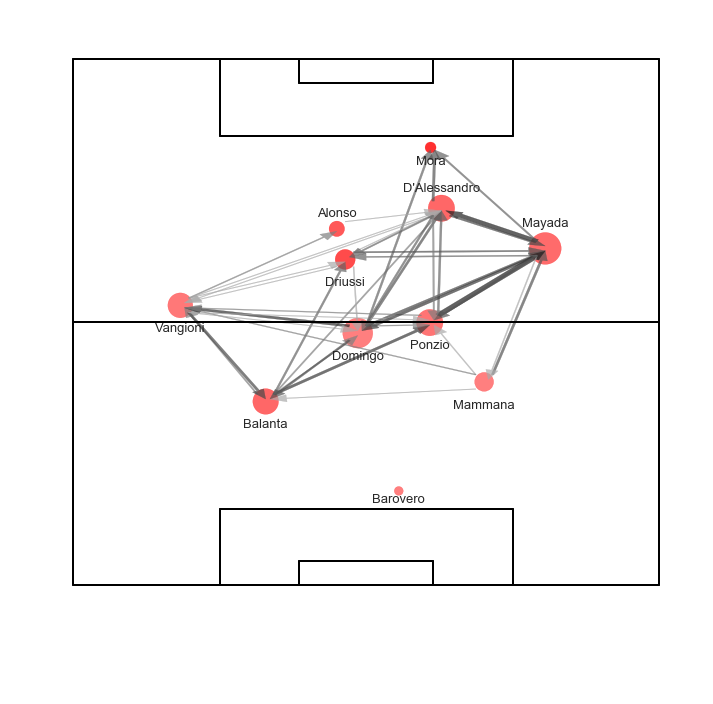

In [62]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x, y, s = touches, color=rgba_colors)
ax.set_axis_bgcolor('0.97')
get_football_field(x_boundaries, y_boundaries, x_small_area, x_big_area,
                        y_small_area, y_big_area)
#ax.annotate('Partido de Vuelta 8vos de Final Copa Libertadores 2016', xy=(0, 117), size = 13, ha="center", weight='bold')
#ax.annotate('Líneas: pases. Grosor y oscuridad indica cantidad de pases', xy=(-17, 89), size = 10, ha="center", color='0.3')
#ax.annotate('Tamaño del Círculo: pases totales completados', xy=(-17, 86), size = 10, ha="center", color='0.3')
#ax.annotate('Posición del Círculo: posición promedio', xy=(-17, 83), size = 10, ha="center", color='0.3')
#ax.annotate('Líneas para 5+ passes', xy=(-17, 80), size = 10, ha="center", color='0.3')
#ax.annotate('Solamente jugadores titulares', xy=(-17, 77), size = 10, ha="center", color='0.3')
#plt.title('River vs Independiente del Valle', fontsize=16, weight='bold')
for i, player in enumerate(players):
    ax.annotate(player, xy=(x[i], y[i]), xytext=(x[i], y[i]-5.5+correction[i]), size = 13, ha="center")
    for n in range(len(players)):
        player_passes = passes[player][n]
        width = player_passes/20
        if player_passes == 0:
            color = '0'
        else:
            color = str(2/player_passes)
        if player_passes > 2: 
            x_start = x[i]
            x_length = x[n] - x[i]
            y_start = y[i]
            y_length = y[n] - y[i]
            if x_length > 0:
                x_start = x[i] + 1
                x_length = x[n] - x[i] - 1
            else:
                x_start = x[i] - 1
                x_length = x[n] - x[i] + 1.5
            if y_length > 0:
                y_start = y[i] + 1.5
                y_length = y[n] - y[i] - 2
            else:
                y_start = y[i] - 1.5
                y_length = y[n] - y[i] + 2
                
            plt.arrow(x_start, y_start, x_length, y_length, 
            head_length=2, color=color, alpha=0.7, width=width,
                            head_width=1.5, length_includes_head=True)
ax.grid('off')
ax.axis('off')